In [3]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [15]:
#屈折率
n_Air = 1
n_Si = np.sqrt(15.26)

#穴の半径
r = 0.1

#穴シフト
R_0 = 1

#計算する固有周波数の数
num_bands = 6

#Γ-K, K-M, M-Γ間の点の個数
num_of_kpoint = 10

#メッシュの細かさ
resolution = 64

h = 200

#-------------------------------------------------------------------#

R = R_0 * 2 / np.sqrt(3)
R1 = R*1

#単位格子
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1./2, np.sqrt(3)/2),
                              basis2=mp.Vector3(1./2, -np.sqrt(3)/2))



#構造
geometry = [
            mp.Cylinder(r, center=mp.Vector3(1/3, 1/6)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),
            
            mp.Cylinder(r, center=mp.Vector3(1/6, -1/6)*R1, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),

            mp.Cylinder(r, center=mp.Vector3(-1/6, -1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),

            mp.Cylinder(r, center=mp.Vector3(-1/3, -1/6)*R1, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),

            mp.Cylinder(r, center=mp.Vector3(-1/6, 1/6)*R, height=h,
                        material=mp.Medium(epsilon=n_Si**2)),
    
            mp.Cylinder(r, center=mp.Vector3(1/6, 1/3)*R1, height=h,
                        material=mp.Medium(epsilon=n_Si**2))
           ]

#ブリルアンゾーン
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(1./2, 0),          # M mp.Vector3(1./2, 0)
    mp.Vector3(1./3, 1./3),    # K mp.Vector3(1./3, 1./3)
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(num_of_kpoint - 2, k_points)

In [16]:
#計算
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3),
                               mpb.fix_efield_phase,
                               mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0.3849,0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (0.19245,-0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (-0.19245,-0.3849,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (-0.3849,-0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (-0.19245,0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (0.19245,0.3849,0)
          radius 0.1, height 200, axis (0, 0, 1)
Geometric object tree has de

tmfreqs:, 22, 0.222222, 0.222222, 0, 0.444444, 0.214674, 0.365133, 0.365884, 0.486599, 0.51935, 0.564789
elapsed time for k point: 0.06710481643676758
solve_kpoint (0.185185,0.185185,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 23, 0.185185, 0.185185, 0, 0.37037, 0.18012, 0.383552, 0.385476, 0.480594, 0.517877, 0.55812
elapsed time for k point: 0.05713772773742676
solve_kpoint (0.148148,0.148148,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 24, 0.148148, 0.148148, 0, 0.296296, 0.144886, 0.401359, 0.404695, 0.476057, 0.514678, 0.549355
elapsed time for k point: 0.05299735069274902
solve_kpoint (0.111111,0.111111,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 25, 0.111111, 0.111111, 0, 0.222222, 0.109119, 0.417774, 0.422357, 0.47389, 0.510237, 0.538587
elapsed time for k point: 0.054960012435913086
solve_kpoint (0.0740741,0.0740741,0):
Solv

tefreqs:, 12, 0.462963, 0.0740741, 0, 0.582083, 0.466983, 0.473515, 0.717611, 0.808674, 0.912709, 0.928263
elapsed time for k point: 0.08623886108398438
solve_kpoint (0.444444,0.111111,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 10 iterations.
tefreqs:, 13, 0.444444, 0.111111, 0, 0.587945, 0.471516, 0.47805, 0.69377, 0.826813, 0.910902, 0.928992
elapsed time for k point: 0.07928252220153809
solve_kpoint (0.425926,0.148148,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 10 iterations.
tefreqs:, 14, 0.425926, 0.148148, 0, 0.596055, 0.47777, 0.484314, 0.668914, 0.843521, 0.908646, 0.92976
elapsed time for k point: 0.08039069175720215
solve_kpoint (0.407407,0.185185,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 10 iterations.
tefreqs:, 15, 0.407407, 0.185185, 0, 0.606322, 0.485661, 0.492224, 0.643293, 0.858384, 0.90605, 0.930475
elapsed time for k point: 0.0740194320678711
solve_kpoint (0.388889,0.222222,0):
Solv

In [17]:
#import csv
#with open('epsilon_distribution.csv', 'wt') as f:
#    writer = csv.writer(f)
#    writer.writerows(converted_eps)

epsilon: 1-15.26, mean 4.10376, harm. mean 1.29836, 26.5625% > 1, 21.7655% "fill"


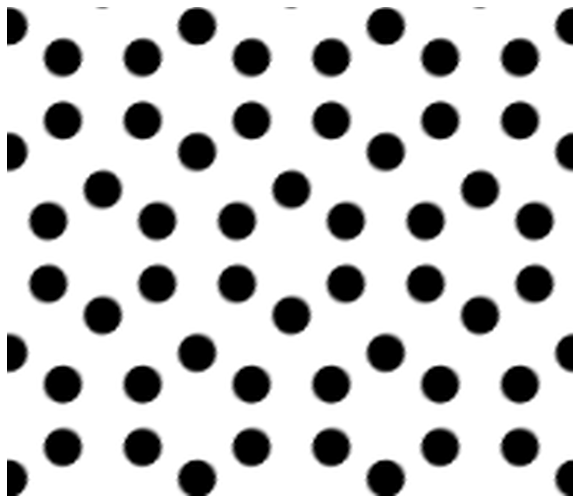

In [18]:
md = mpb.MPBData(rectify=True, periods=3, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

plt.figure(figsize=(12,9))
plt.imshow(converted_eps.T, interpolation='spline36', cmap="binary")
plt.axis('off')
plt.show()

In [19]:
tm_freqs.max()

0.5727907963032745

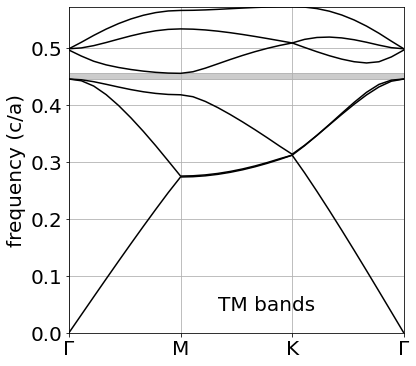

In [20]:
fs = 20

fig, ax = plt.subplots(figsize=(6,6))

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
#for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
#    ax.scatter([xz]*len(tmz), tmz, color='blue')
#    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='black')
#ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

#for gap in te_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='black', size=fs)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fs)
ax.set_ylabel('frequency (c/a)', size=fs)
ax.grid(True)
plt.tick_params(labelsize=fs)
plt.savefig("2D_pillar_honeycomb_π_6_normFreq.png", bbox_inches="tight")

plt.show()

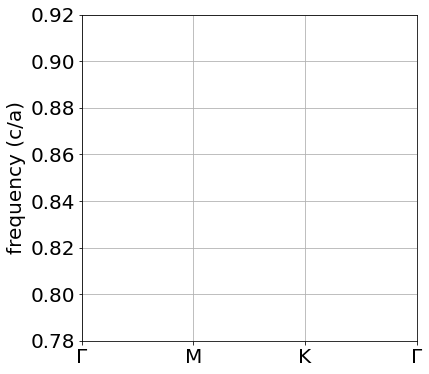

In [13]:
fs = 20

fig, ax = plt.subplots(figsize=(6,6))

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
#for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
#    ax.scatter([xz]*len(tmz), tmz, color='blue')
#    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='black')
#ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

#for gap in te_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
#ax.text(12, 0.04, 'TM bands', color='black', size=15)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

ax.set_ylim([0.78,0.92])

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fs)
ax.set_ylabel('frequency (c/a)', size=fs)
ax.grid(True)

plt.tick_params(labelsize=fs)
plt.savefig("2D_pillar_honeycomb_π_6_normFreq2.png", bbox_inches="tight")

plt.show()

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0.3849,0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (0.19245,-0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (-0.19245,-0.3849,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (-0.3849,-0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (-0.19245,0.19245,0)
          radius 0.1, height 200, axis (0, 0, 1)
     cylinder, center = (0.19245,0.3849,0)
          radius 0.1, height 200, axis (0, 0, 1)
Geometric object tree has de

Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 21, 0.259259, 0.259259, 0, 0.518519, 0.248381, 0.346679, 0.346801, 0.493581, 0.518637, 0.569373
elapsed time for k point: 0.07039427757263184
solve_kpoint (0.222222,0.222222,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 22, 0.222222, 0.222222, 0, 0.444444, 0.214674, 0.365133, 0.365884, 0.486599, 0.51935, 0.564789
elapsed time for k point: 0.05326080322265625
solve_kpoint (0.185185,0.185185,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 23, 0.185185, 0.185185, 0, 0.37037, 0.18012, 0.383552, 0.385476, 0.480594, 0.517877, 0.55812
elapsed time for k point: 0.05307316780090332
solve_kpoint (0.148148,0.148148,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 5 iterations.
tmfreqs:, 24, 0.148148, 0.148148, 0, 0.296296, 0.144886, 0.401359, 0.404695, 0.476057, 0.514678, 0.549355
elapse

ValueError: num must be 1 <= num <= 12, not 0

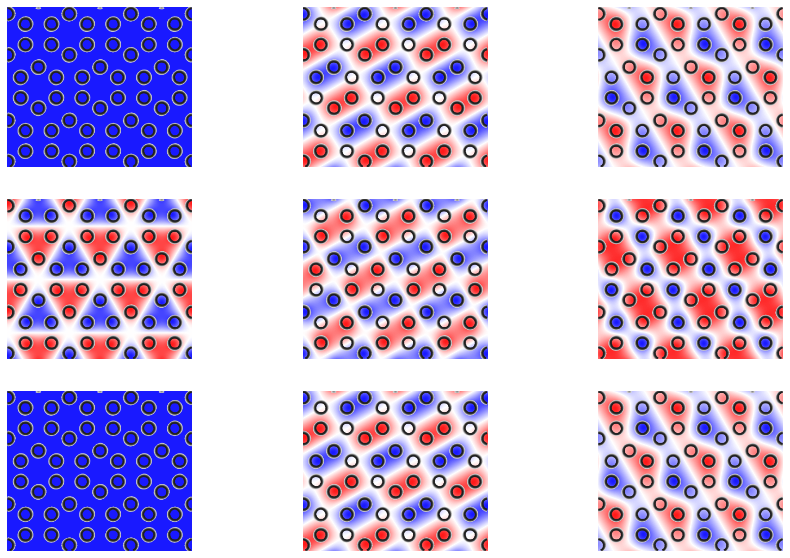

In [21]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0,0), mpb.fix_efield_phase, get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=64, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

plt.figure(figsize=(15,10))
    
for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()

In [ ]:
#THz表示
a = 10*np.sqrt(3)*10**3
c_const = 299792458

fontsize = 18
tm_freqs_THz = np.array(tm_freqs) * c_const/(a*10**3)
tm_gaps_THz = np.array(tm_gaps) * c_const/(a*10**3)
#print(te_freqs_THz)

fig, ax = plt.subplots(figsize=(8,6))

x = range(len(tm_freqs))

#for xz, tmz in zip(x, tm_freqs_THz):
#    ax.scatter([xz]*len(tmz), tmz, color='olive')

ax.plot(tm_freqs_THz, color='black')
#ax.set_ylim([tm_freqs_THz.min(), tm_freqs_THz.max()])
ax.set_ylim([11,14])
ax.set_xlim([x[0], x[-1]])

for gap in tm_gaps_THz:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='black', alpha=0.2)

ax.text(11.5, 11.5, 'TM bands', color='black', size=18)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fontsize)
ax.set_ylabel('frequency [GHz]', size=fontsize)
plt.tick_params(labelsize=fontsize)
ax.grid(True)

plt.savefig("2D_pillar_honeycomb_π_6_GHzFreq.png")

plt.show()

# 